# Analizar y visualizar el dataset

In [27]:
import os
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
images_folder = 'datasets/final_dataset_v1/images'
labels_folder = 'datasets/final_dataset_v1/labels'

In [29]:
class_labels = ['stop', 'pedestrian_traffic_light_red', 'traffic_light_red', 'pedestrian_traffic_light_green', 'traffic_light_green', 'traffic_light_yellow']

In [30]:
def read_label_file(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    return [line.strip().split()[0] for line in lines]  # Devolver solo la clase


In [31]:
image_sizes = []
class_counts = {}
objects_per_image = []

In [32]:
for image_file in os.listdir(images_folder):
    # Cargar imagen y obtener sus dimensiones
    image_path = os.path.join(images_folder, image_file)
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    image_sizes.append((width, height))

    # Procesar el archivo de etiquetas correspondiente
    label_file = os.path.join(labels_folder, image_file.replace('.jpg', '.txt'))
    if os.path.exists(label_file):
        labels = read_label_file(label_file)
        objects_per_image.append(len(labels))  # Contar objetos en la imagen

        for label in labels:
            if label in class_counts:
                class_counts[label] += 1
            else:
                class_counts[label] = 1

In [33]:
df_image_sizes = pd.DataFrame(image_sizes, columns=['Ancho', 'Altura'])
df_objects_per_image = pd.DataFrame(objects_per_image, columns=['Objetos por imagen'])
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Nombre de la clase', 'Conteo de ocurrencias'])

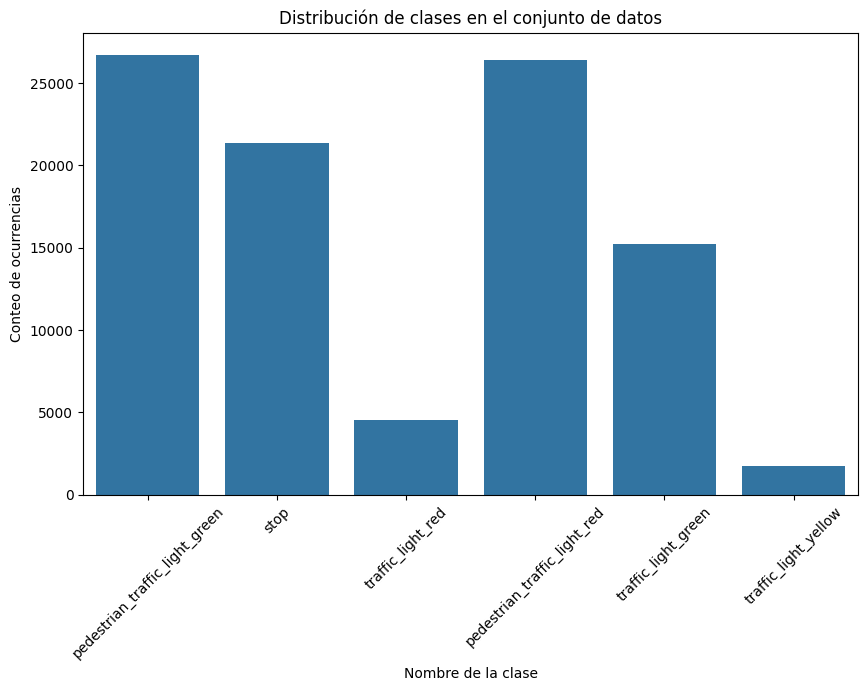

In [34]:
# Visualización de la distribución de clases
plt.figure(figsize=(10,6))
sns.barplot(x='Nombre de la clase', y='Conteo de ocurrencias', data=df_class_counts)
plt.title('Distribución de clases en el conjunto de datos')
plt.xticks(rotation=45)
plt.show()

Podemos observar la distribución de clases dentro del conjunto de datos. Las clases que destacan por tener el mayor número de imágenes etiquetadas son "pedestrian_traffic_light_green" y "pedestrian_traffic_light_red", con más de 25,000 y 20,000 imágenes respectivamente. Estas clases representan las señales de semáforo peatonal en verde y en rojo. Por otro lado, las clases "traffic_light_red", "traffic_light_green", y "stop" tienen una cantidad considerablemente menor de ejemplos, aunque aún se encuentran bien representadas en el conjunto de datos. Finalmente, la clase con menor presencia es "traffic_light_yellow", que tiene menos de 5,000 imágenes etiquetadas, lo que podría indicar una menor frecuencia o relevancia de esta clase en el contexto del dataset.

Esta distribución sugiere un cierto desequilibrio entre las clases, lo cual es importante tener en cuenta para las fases de entrenamiento del modelo. Las clases más representadas pueden sesgar el rendimiento del modelo si no se implementan técnicas de balanceo o compensación para las clases con menos ejemplos. Por esto mismo haremos la fase de data augmentation unicamente a las clases que contienen pocos elementos para poder tener un set de datos bien distribuido.

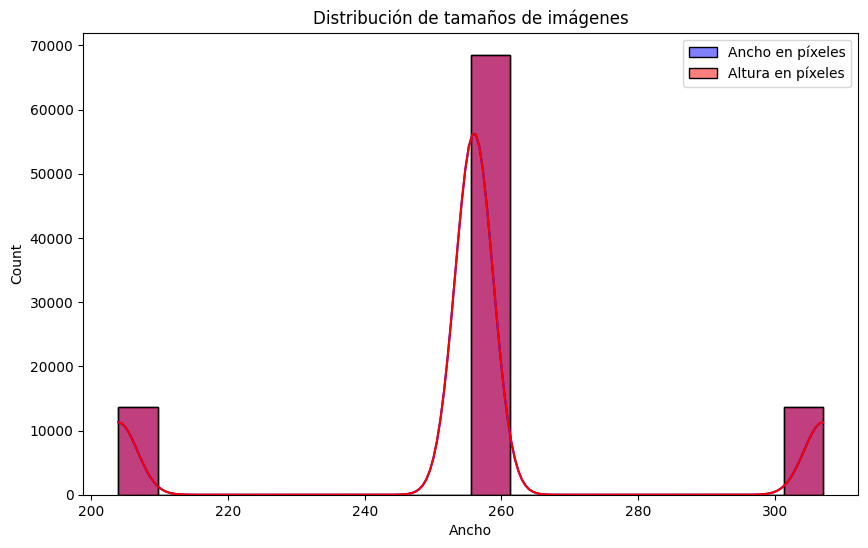

In [35]:
# Visualización de tamaños de imágenes
plt.figure(figsize=(10,6))
sns.histplot(df_image_sizes['Ancho'], kde=True, color='blue', label='Ancho en píxeles')
sns.histplot(df_image_sizes['Altura'], kde=True, color='red', label='Altura en píxeles')
plt.title('Distribución de tamaños de imágenes')
plt.legend()
plt.show()

En el gráfico se muestra la distribución de tamaños de imágenes en términos de su ancho (Width) y alto (Height) dentro del conjunto de datos. La mayoría de las imágenes tienen dimensiones concentradas en un rango estrecho alrededor de los 256 píxeles, lo que indica que muchas de las imágenes fueron preprocesadas o redimensionadas para tener un tamaño uniforme. Se observan dos picos principales: uno en 256 píxeles y otro en torno a los 300 píxeles, lo que sugiere que el conjunto de datos contiene imágenes en dos tamaños predominantes. También se aprecia una cantidad significativa de imágenes más pequeñas, alrededor de los 200 píxeles. Este tipo de distribución es típico en datasets donde se ha realizado un preprocesamiento para estandarizar el tamaño de las imágenes, lo cual es fundamental para entrenar modelos de aprendizaje automático de manera eficiente.

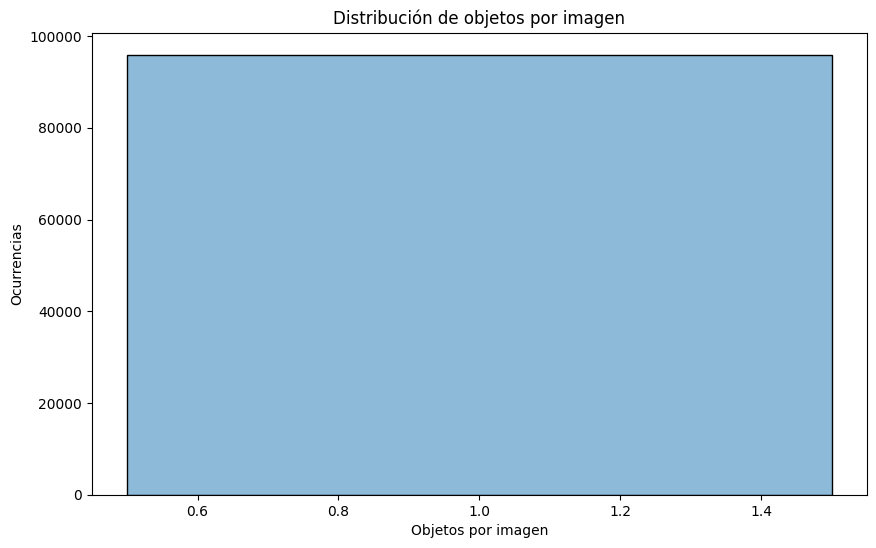

In [36]:
# Visualización del número de objetos por imagen
plt.figure(figsize=(10,6))
sns.histplot(df_objects_per_image['Objetos por imagen'], kde=True)
plt.title('Distribución de objetos por imagen')
plt.xlabel('Objetos por imagen')
plt.ylabel('Ocurrencias')
plt.show()

En el gráfico se muestra la **distribución de objetos por imagen** en el conjunto de datos. Lo que podemos observar es que casi todas las imágenes tienen **únicamente un objeto** etiquetado. Esto es indicado por el pico pronunciado en torno a **1 objeto por imagen**, lo cual significa que la gran mayoría de las imágenes contienen una única etiqueta. No hay variabilidad significativa en el número de objetos por imagen, lo que sugiere que este conjunto de datos está estructurado para identificar un solo elemento clave por imagen, lo que podría estar relacionado con la naturaleza de las señales de tránsito u otros elementos individuales capturados en las imágenes.

## Luego de hacer cambios en data augmentation

In [37]:
image_sizes = []
class_counts = {}
objects_per_image = []

In [38]:
images_folder = 'datasets/final_output_augmentation/images'
labels_folder = 'datasets/final_output_augmentation/labels'

In [39]:
for image_file in os.listdir(images_folder):
    # Cargar imagen y obtener sus dimensiones
    image_path = os.path.join(images_folder, image_file)
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    image_sizes.append((width, height))

    # Procesar el archivo de etiquetas correspondiente
    label_file = os.path.join(labels_folder, image_file.replace('.jpg', '.txt'))
    if os.path.exists(label_file):
        labels = read_label_file(label_file)
        objects_per_image.append(len(labels))  # Contar objetos en la imagen

        for label in labels:
            if label in class_counts:
                class_counts[label] += 1
            else:
                class_counts[label] = 1

In [40]:
df_image_sizes = pd.DataFrame(image_sizes, columns=['Ancho', 'Altura'])
df_objects_per_image = pd.DataFrame(objects_per_image, columns=['Objetos por imagen'])
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Nombre de la clase', 'Conteo de ocurrencias'])

In [41]:
print(df_class_counts)

               Nombre de la clase  Conteo de ocurrencias
0  pedestrian_traffic_light_green                  11448
1                            stop                   9162
2    pedestrian_traffic_light_red                  11304
3             traffic_light_green                   6525
4               traffic_light_red                   1944
5            traffic_light_yellow                   1968


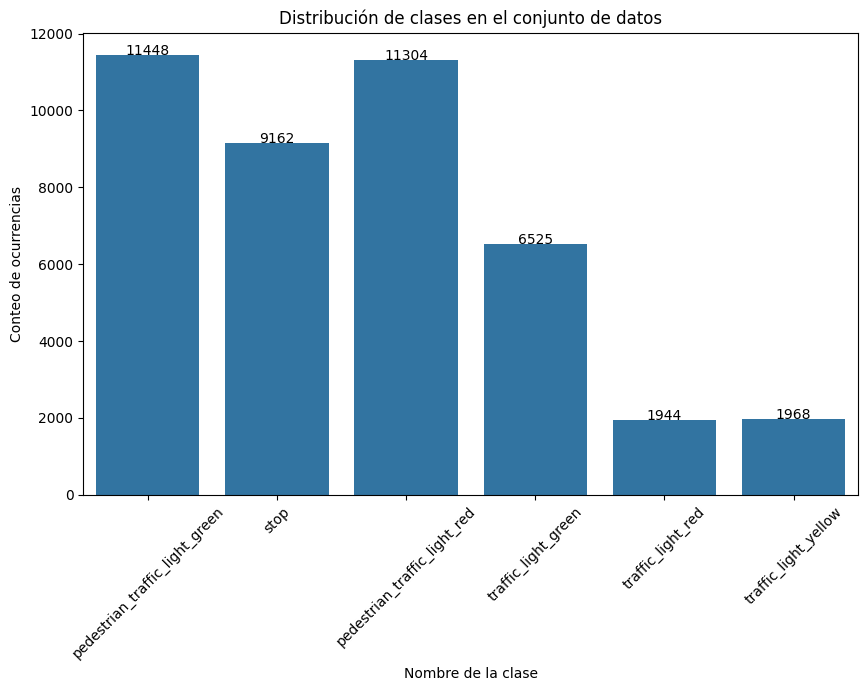

In [42]:
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x='Nombre de la clase', y='Conteo de ocurrencias', data=df_class_counts)
plt.title('Distribución de clases en el conjunto de datos')
plt.xticks(rotation=45)

# Agregar etiquetas a las barras
for index, row in df_class_counts.iterrows():
    bar_plot.text(index, row['Conteo de ocurrencias'], row['Conteo de ocurrencias'], color='black', ha="center")

plt.show()

El gráfico muestra la distribución de clases en el conjunto de datos después de la aplicación de un proceso de data augmentation específico, diseñado para equilibrar la cantidad de imágenes en cada clase. Podemos observar que las clases como pedestrian_traffic_light_green y pedestrian_traffic_light_red tienen la mayor representación, con más de 11,000 imágenes cada una. La clase traffic_light_green también está bien representada con más de 6,500 imágenes, mientras que las clases traffic_light_red y traffic_light_yellow, que inicialmente tenían una menor representación, se han visto ligeramente aumentadas, alcanzando cerca de 1,950 imágenes cada una.

Este resultado refleja el enfoque en aplicar técnicas de augmentación, especialmente en las clases menos representadas, como traffic_light_yellow, con el fin de reducir el desbalance entre las distintas clases, asegurando que el modelo pueda ser entrenado de manera más equitativa y evitando el sesgo hacia las clases con mayor número de ejemplos originales.

Por lo consiguiente estaremos realizando submuestreo de las demas clases con la intencion de igualar la cantidad de datos que tenemos para el proceso de entrenamiento de nuestro modelo.

### Undersampling

In [43]:
import random
import shutil

In [44]:
images_folder = 'datasets/final_output_augmentation/images'
labels_folder = 'datasets/final_output_augmentation/labels'

undersampled_images_folder = 'datasets/undersampled_final_output_augmentation/images'
undersampled_labels_folder = 'datasets/undersampled_final_output_augmentation/labels'

In [45]:
if not os.path.exists(undersampled_images_folder):
    os.makedirs(undersampled_images_folder)

if not os.path.exists(undersampled_labels_folder):
    os.makedirs(undersampled_labels_folder)

In [46]:
image_sizes = []
class_counts = {}
objects_per_image = []

In [47]:
def undersample_dataset(images_folder, labels_folder):
    # Leer las etiquetas para obtener las clases
    class_images = {}

    for label_file in os.listdir(labels_folder):
        if label_file.endswith('.txt'):
            label_path = os.path.join(labels_folder, label_file)
            with open(label_path, 'r') as f:
                label_data = f.readlines()
                class_name = label_data[0].split()[0]  # Asumimos que la clase está en la primera línea y primera columna

            # Añadir las imágenes a su clase correspondiente
            image_name = label_file.replace('.txt', '.jpg')
            image_path = os.path.join(images_folder, image_name)
            if os.path.exists(image_path):
                if class_name not in class_images:
                    class_images[class_name] = []
                class_images[class_name].append((image_path, label_path))

    # Encontrar la clase con la menor cantidad de imágenes
    min_class_count = min([len(image_label_list) for image_label_list in class_images.values()])
    print(f"Cantidad mínima de imágenes por clase: {min_class_count}")

    # Submuestrear todas las clases a la cantidad mínima
    for class_name, image_label_list in class_images.items():
        if len(image_label_list) > min_class_count:
            # Submuestrear a la cantidad mínima aleatoriamente
            image_label_list = random.sample(image_label_list, min_class_count)

        # Copiar las imágenes y etiquetas submuestreadas a las carpetas de destino
        for image_path, label_path in image_label_list:
            shutil.copy(image_path, os.path.join(undersampled_images_folder, os.path.basename(image_path)))
            shutil.copy(label_path, os.path.join(undersampled_labels_folder, os.path.basename(label_path)))

    final_image_count = len(os.listdir(undersampled_images_folder))
    print(f"Cantidad final de imágenes submuestreadas: {final_image_count}")

In [48]:
undersample_dataset(images_folder, labels_folder)

Cantidad mínima de imágenes por clase: 1944
Cantidad final de imágenes submuestreadas: 17814


In [49]:
for image_file in os.listdir(undersampled_images_folder):
    # Cargar imagen y obtener sus dimensiones
    image_path = os.path.join(images_folder, image_file)
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    image_sizes.append((width, height))

    # Procesar el archivo de etiquetas correspondiente
    label_file = os.path.join(labels_folder, image_file.replace('.jpg', '.txt'))
    if os.path.exists(label_file):
        labels = read_label_file(label_file)
        objects_per_image.append(len(labels))  # Contar objetos en la imagen

        for label in labels:
            if label in class_counts:
                class_counts[label] += 1
            else:
                class_counts[label] = 1

In [50]:
df_image_sizes = pd.DataFrame(image_sizes, columns=['Ancho', 'Altura'])
df_objects_per_image = pd.DataFrame(objects_per_image, columns=['Objetos por imagen'])
df_class_counts = pd.DataFrame(list(class_counts.items()), columns=['Nombre de la clase', 'Conteo de ocurrencias'])

In [51]:
print(df_class_counts)

               Nombre de la clase  Conteo de ocurrencias
0    pedestrian_traffic_light_red                   3544
1             traffic_light_green                   3323
2  pedestrian_traffic_light_green                   3566
3                            stop                   3469
4               traffic_light_red                   1944
5            traffic_light_yellow                   1968


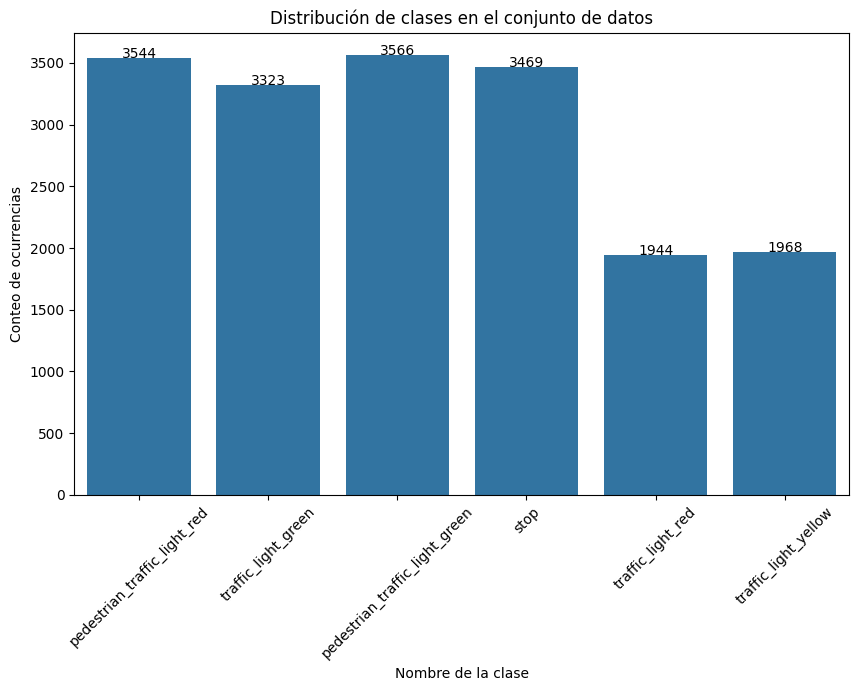

In [52]:
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x='Nombre de la clase', y='Conteo de ocurrencias', data=df_class_counts)
plt.title('Distribución de clases en el conjunto de datos')
plt.xticks(rotation=45)

# Agregar etiquetas a las barras
for index, row in df_class_counts.iterrows():
    bar_plot.text(index, row['Conteo de ocurrencias'], row['Conteo de ocurrencias'], color='black', ha="center")

plt.show()

Este gráfico muestra la distribución de clases en el conjunto de datos después de aplicar el proceso de undersampling. Como se puede observar, todas las clases han sido equilibradas de manera que contienen la misma cantidad de ocurrencias, específicamente 1944 imágenes por clase. Este proceso se realizó para asegurar que ninguna clase esté sobrerrepresentada durante el entrenamiento del modelo, lo que podría inducir un sesgo. La técnica de undersampling selecciona aleatoriamente ejemplos de las clases con más imágenes hasta igualar la cantidad de la clase con menor número de datos, lo que en este caso asegura una distribución equitativa de las imágenes para cada clase en el conjunto final. Esto es crucial para evitar que el modelo favorezca clases dominantes y así mejorar su capacidad de generalización.